In [116]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from skimage import filters, morphology
import skimage
import os
import random
import cv2

print(np.__version__)

%matplotlib inline

1.15.3


In [117]:
imagesPath = "../dataset/actual/"
N = 5

# birdsPath = imagesPath + "birds/"
# testImageName = "birds/001.Black_footed_Albatross/Black_footed_Albatross_0027_2134388676.jpg"

In [118]:
def plot_images(images, _cmap=None):
    fig=plt.figure(figsize=(8, 16))
    rows = len(images)
    columns = 1
    for i, image in enumerate(images):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(image, cmap=_cmap)
    plt.show()
    

Fetching from  ['birds', 'drones']


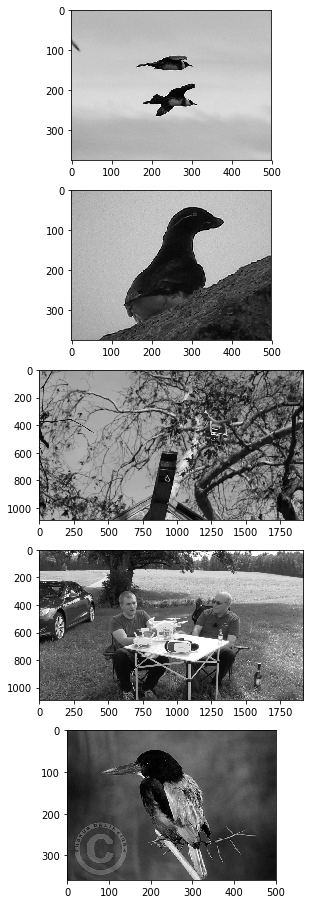

5


In [119]:

images = []
imageNames = []

directories = os.listdir(imagesPath)
directories.sort()
print("Fetching from ", directories)


for directory in directories:
    ims = os.listdir(imagesPath + directory + '/')
    ims.sort()
    numOfImages = len(ims)
    for imageName in ims:
        imageNames.append(imagesPath + directory + '/' + imageName)
#         images.append(Image.open(imagesPath + directory + '/' + imageName).convert('L'))

random.shuffle(imageNames)

for i in range(N):
    images.append(Image.open(imageNames[i]).convert('L'))
    
plot_images(images)
    
numOfImages = len(images)
print(numOfImages)

0.14.1


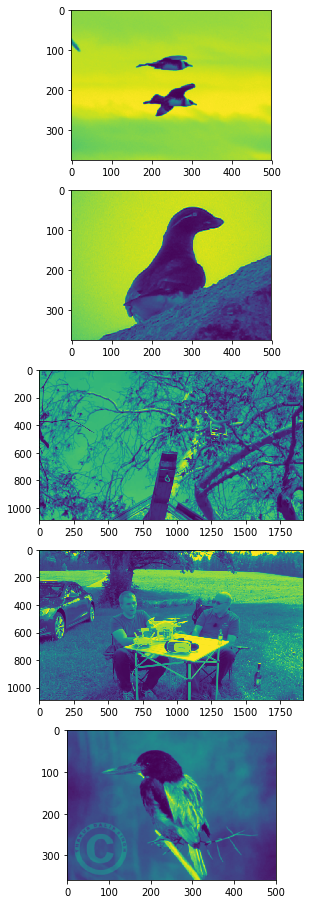

In [120]:
# Run Gaussian Filter
print(skimage.__version__)

smooth = []
for image in images:
#     edge = filters.laplace(np.asarray(image))
    smooth.append(filters.gaussian(np.asarray(image), 1))

plot_images(smooth)
    
# smoothIm = filters.gaussian(np.asarray(im), 1)
# print(type(smoothIm))
# imshow(smoothIm)

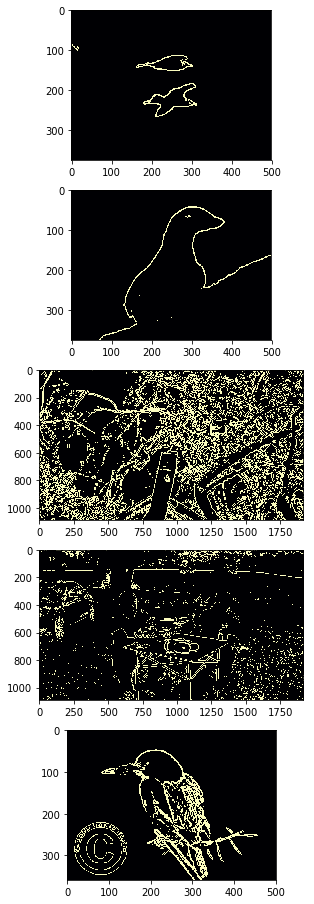

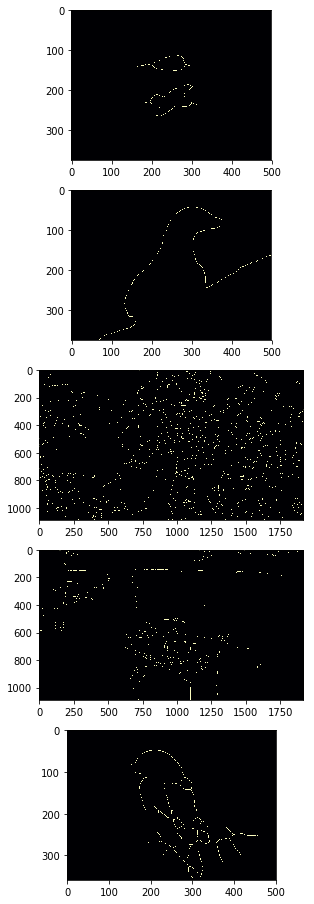

In [121]:
# Run Sobel Filter
edges = []

for image in smooth:
    sobel = filters.prewitt(image)
    edge = filters.threshold_local(sobel, 3)
    otsu = filters.threshold_otsu(edge)
    edges.append(edge > otsu)
    
#     low = 0.1
#     high = 0.35

#     lowt = (sobel > low).astype(int)
#     hight = (sobel > high).astype(int)
#     hyst = filters.apply_hysteresis_threshold(sobel, low, high)

#     edges.append(hyst)
    
plot_images(edges, 'magma')
    
for i, image in enumerate(edges):
#     edges[i] = imfill(edges[i], 'holes')
#     edges[i] = morphology.erosion(edges[i], morphology.disk(1))
#     edges[i] = morphology.remove_small_holes(edges[i], 100)
    edges[i] = morphology.remove_small_objects(edges[i], 500)
    edges[i] = morphology.closing(edges[i], morphology.disk(5))
    edges[i] = morphology.thin(edges[i])
#     edges[i] = np.array(edges[i], dtype=np.uint8)
#     points = cv2.findNonZero(edges[i])
#     for j in range(10):
#         print(points[j])
#     print(len(points))
#     edges[i] = morphology.convex_hull_image(edges[i])
#     edges[i] = morphology.opening(edges[i], morphology.disk(2))
plot_images(edges, 'magma')
# imshow(hight + hyst, cmap='magma')

(500,)
163 314 112 265
70 499 41 374
0 1919 0 1089
0 1918 0 1089
153 456 47 357


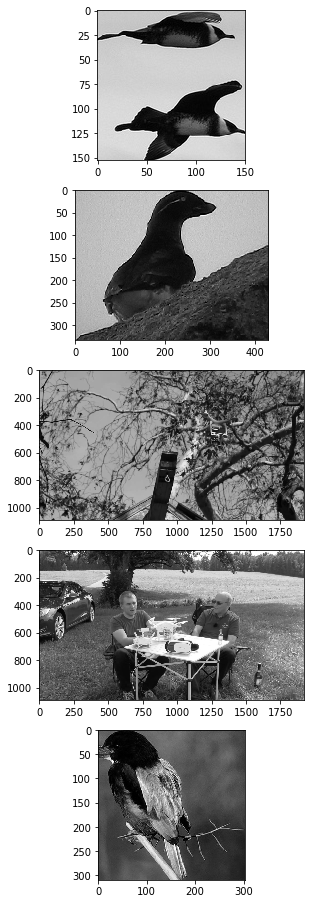

In [122]:
print(edges[0][0, :].shape)

for j, edge in enumerate(edges):
    l = 0
    d = edge.shape[0] - 1
    u = 0
    r = edge.shape[1] - 1
    for i in range(l, r):
        maxi = np.amax(edge[:, i])
        if (maxi == True):
            break
        l = i
    
    for i in range(r, l, -1):
        maxi = np.amax(edge[:, i])
        if (maxi == True):
            break
        r = i
    
    for i in range(u, d):
        maxi = np.amax(edge[i, :])
        if (maxi == True):
            break
        u = i
    
    for i in range(d, u, -1):
        maxi = np.amax(edge[i, :])
        if (maxi == True):
            break
        d = i
    
    images[j] = images[j].crop((l, u, r, d))
    
    print(l, r, u, d)
    
plot_images(images)